In [15]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00


In [52]:
import pandas as pd
import pylab as plt
import matplotlib
import cartopy.crs as ccrs
import glob

In [1]:
# Access my files if using Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
folder_path = '/content/drive/MyDrive/Photolysis data/'

# Read the csv file which was created in 'ATom_J_data_preprocessing' script.
atom_file_path = folder_path + 'ATom_MER10_Dataset.20210613/photolysis_data.csv'
atom_all_data = pd.read_csv(atom_file_path, index_col=0) # type = Dataframe. Shape = (138454, 50)

In [68]:
# Select the dates we want.
# 12/8/16  14/10/17  19/5/18
def get_data_by_date(date, data):
  # date should be a string like '2016-08-12'.
  day = data[data.index.str.contains(date)] # type = Dataframe. shape = (629, 49).
  return day

def view_location(data):
  x = data['G_LONG']
  y = data['G_LAT']
  plt.scatter(x+50, y, s=1)

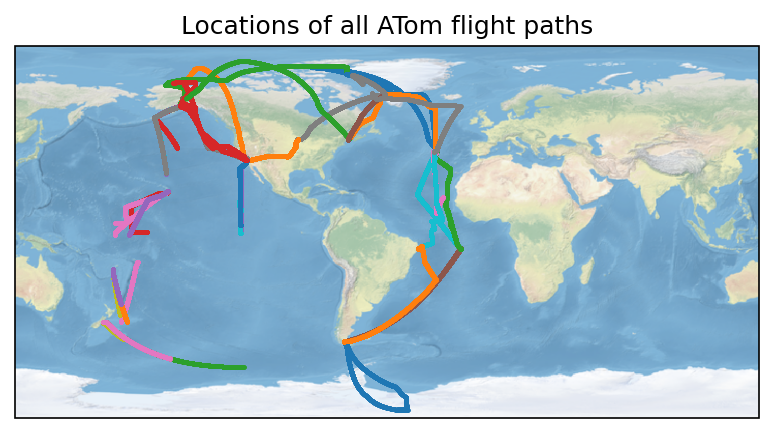

In [86]:
# Get all the dates.
def get_date(file_path):
  date = file_path[-16:-8]
  date = f'{date[0:4]}-{date[4:6]}-{date[6:8]}'
  return date

all_files = glob.glob(folder_path + 'ATom_MER10_Dataset.20210613/*.ict')
all_dates = []
for each_file in all_files:
   date = get_date(each_file)
   all_dates.append(date)

fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=310.0))
ax.stock_img()
plt.title('Locations of all ATom flight paths')
for date in all_dates:
  day = get_data_by_date(date, atom_all_data)
  view_location(day)
plt.show()

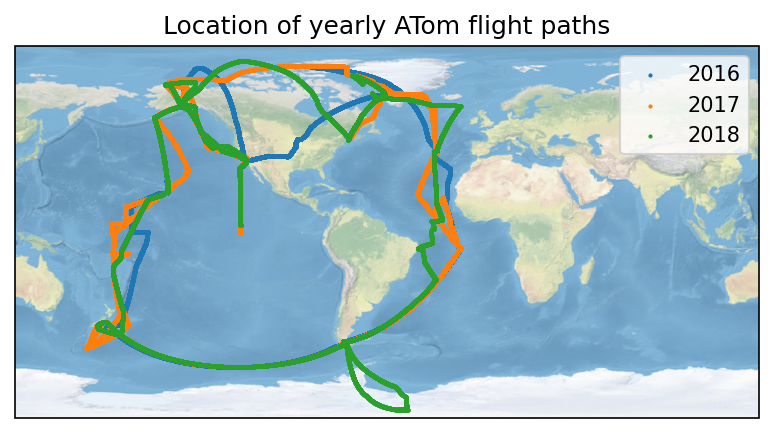

In [77]:
dates = ['2016', '2017', '2018']

fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=310.0))
ax.stock_img()
plt.title('Locations of yearly ATom flight paths')
for date in dates:
  day = get_data_by_date(date, atom_all_data)
  view_location(day)
plt.legend(dates)
plt.show()

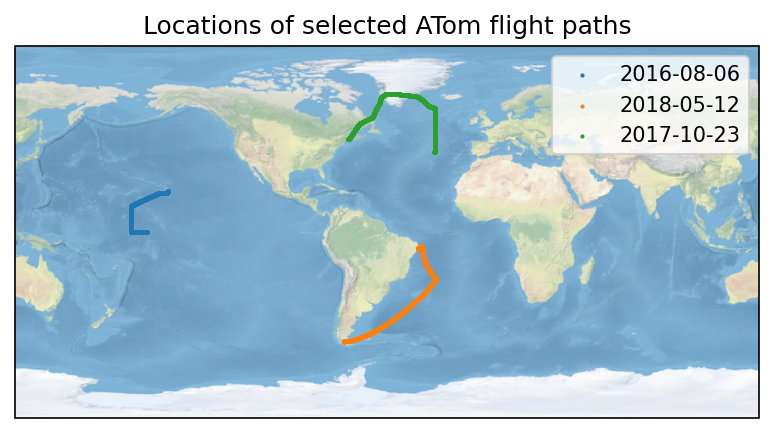

In [85]:
# Some particularly good dates for variety:
# '2016-08-06' mid pacific
# '2016-08-08' south pacific
# '2016-08-15' south atlantic
# '2016-08-17' mid atlantic
# '2016-08-20' arctic + north atlantic
# '2017-10-23' north atlantic
# '2018-05-12' south atlantic
# '2018-05-19' arctic

# I chose these because they are different years, months and locations and have lots of data:
# '2016-08-06' mid pacific
# '2017-10-23' north atlantic
# '2018-05-12' south atlantic

dates = ['2016-08-06', '2018-05-12', '2017-10-23']

fig = plt.figure(dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=310.0))
ax.stock_img()
plt.title('Locations of selected ATom flight paths')
for date in dates:
  day = get_data_by_date(date, atom_all_data)
  view_location(day)
plt.legend(dates)
plt.show()